<a href="https://colab.research.google.com/github/khatamirock/colabs_AI_LAB/blob/main/CAR_PRICE_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH ML

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!git clone https://github.com/alexeygrigorev/mlbookcamp-code

Cloning into 'mlbookcamp-code'...
remote: Enumerating objects: 4270, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 4270 (delta 58), reused 80 (delta 33), pack-reused 4146
Receiving objects: 100% (4270/4270), 9.02 MiB | 24.12 MiB/s, done.
Resolving deltas: 100% (2553/2553), done.


In [ ]:
%cd /content/mlbookcamp-code/chapter-02-car-price

/content/mlbookcamp-code/chapter-02-car-price


In [ ]:
df = pd.read_csv('data.csv')
len(df)

11914

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.columns =df.columns.str.lower().str.replace(' ','_')

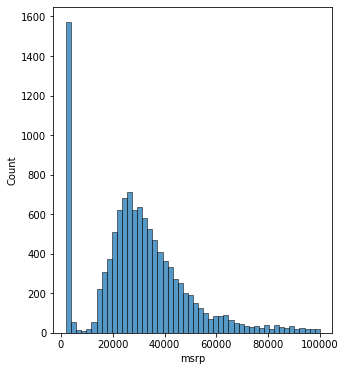

In [ ]:
plt.figure(figsize=(5, 6))
sns.histplot(df.msrp[df.msrp<100000],bins=50)
plt.show()

In [ ]:
price=np.log1p(df.msrp+1)


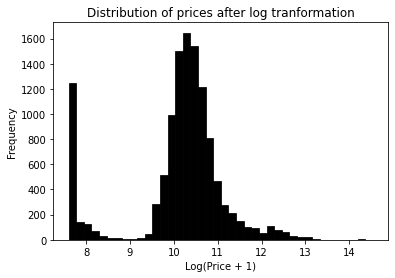

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(price, bins=40, color='black', alpha=1)
plt.ylabel("Frequency")
plt.xlabel("Log(Price + 1)")
plt.title('Distribution of prices after log tranformation')

plt.show()

In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
n = len(df) 
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
df_train.shape[0]

7150

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    # 

    XTX = X.T.dot(X)
    print(XTX.shape)
    # print(XTX)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
# all numerical columns!!

In [ ]:
# making the dataframe a Matrix ....

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)



In [ ]:
# xx=prepare_X(df_val)
# xx[:10,:10]

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
w_0,w

(6, 6)


(7.89132829807369,
 array([ 9.76239506e-03, -1.58659988e-01,  1.53646557e-02,  1.49232816e-02,
        -1.54111966e-05]))

In [ ]:
y_pred = w_0 + X_train.dot(w)


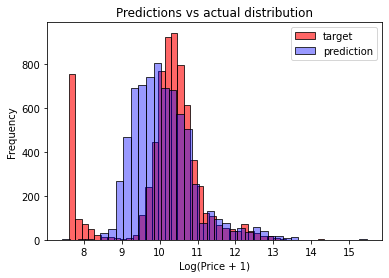

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='r', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='b', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7507040626902675

In [ ]:
df.groupby('make')['model'].count().head()

make
Acura           252
Alfa Romeo        5
Aston Martin     93
Audi            328
BMW             334
Name: model, dtype: int64

In [ ]:
df['make'].value_counts().head(5)

Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: make, dtype: int64

In [ ]:


# df_num=base.copy()
# df_num

In [ ]:
df['engine_fuel_type'].value_counts()


regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: engine_fuel_type, dtype: int64

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2.0, 3.0, 4.0]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    # manatory to work in ease
    df.make=df.make.str.lower()
    df.engine_fuel_type=df.engine_fuel_type.str.lower().str.replace(' ','_')

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    


    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]  
    df_num = df_num.fillna(0)
    X = df_num.values #making a mtrix and then returning !!!!
    return X




In [ ]:
    
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

(19, 19)
train: 0.47408711590795294
validation: 0.4844787588707744


# Regularization
cause if we addded more features from the dataframe
it will make the case worse instead of making a good state
the main reason is the inverse matrix and singular matrix
for this reason the matrix cant offer us a good weight 
for inter-dependency of variables of those features


In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
xx=[]
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    pre= rmse(y_val, y_pred)
    xx.append(pre)
    print('%6s' %r,pre)
print(sorted(xx))

 1e-06 0.4844787599398887
0.0001 0.4844788658206354
 0.001 0.4844798283046039
  0.01 0.48448944637314145
   0.1 0.4845849032772187
     1 0.48548990029131256
     5 0.4905623937121348
    10 0.499400781333044
[0.4844787599398887, 0.4844788658206354, 0.4844798283046039, 0.48448944637314145, 0.4845849032772187, 0.48548990029131256, 0.4905623937121348, 0.499400781333044]


# DL

In [ ]:
arr = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]])

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
 boston_housing.load_data())

In [ ]:
train_data.shape,test_data.shape

((404, 13), (102, 13))

In [ ]:
arr.mean(0),arr.mean(),arr.mean(0).sum()/4

(array([5., 6., 7., 8.]), 6.5, 6.5)

In [ ]:
train_data[:10,:].mean(0) 

array([  2.723721,   8.25    ,  13.809   ,   0.      ,   0.6371  ,
         5.8494  ,  80.46    ,   3.08011 ,  10.2     , 440.7     ,
        18.67    , 370.723   ,  16.057   ])

In [ ]:
df_train=pd.read_csv('/content/sample_data/california_housing_train.csv')
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


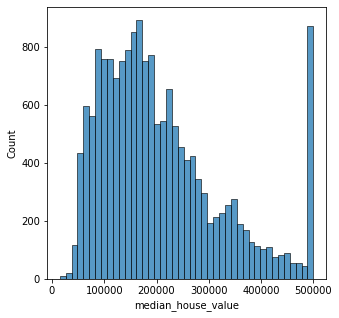

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df_train.median_house_value)
df_prc=df_train.median_house_value.copy()

df_prc= np.log1p(df_prc)




<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

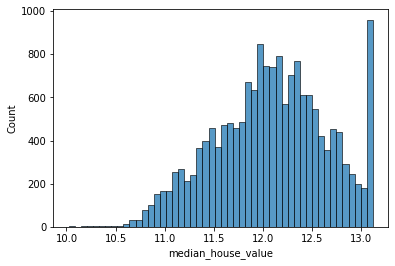

In [ ]:
sns.histplot(df_prc[df_prc>10],bins=50)

# Understanding Data With Descriptive Statistics


In [ ]:
from pandas import set_option

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df=pd.read_csv('/content/pima-indians-diabetes.csv',names=names)
set_option('precision',3  )

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum(),df.shape,df.dtypes

(preg     0
 plas     0
 pres     0
 skin     0
 test     0
 mass     0
 pedi     0
 age      0
 class    0
 dtype: int64, (768, 9), preg       int64
 plas       int64
 pres       int64
 skin       int64
 test       int64
 mass     float64
 pedi     float64
 age        int64
 class      int64
 dtype: object)

In [ ]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [ ]:
# from pandas._libs.hashtable import value_count
df.groupby('class').size()


class
0    500
1    268
dtype: int64

In [ ]:
relation=df.corr(method='pearson')['class'] #showing the correlation 
relation


preg     0.222
plas     0.467
pres     0.065
skin     0.075
test     0.131
mass     0.293
pedi     0.174
age      0.238
class    1.000
Name: class, dtype: float64

# VISUALIZATION

In [ ]:
df.skew()

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64

<Figure size 648x648 with 0 Axes>

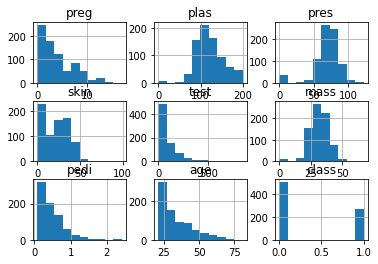

In [ ]:
plt.figure(figsize=(9,9))
df.hist()
plt.show()

<Figure size 648x648 with 0 Axes>

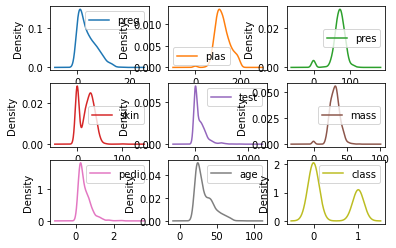

In [ ]:
plt.figure(figsize=(9,9))
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
SelectKBest(score_func=chi2, k=4)


SelectKBest(k=4, score_func=<function chi2 at 0x7f2838011af0>)

# TEST_TRAIN - validation on data 
## with logistic regeression - classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
dff=df.values
x=dff[:,:8]
y=dff[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size,
random_state=seed)


In [ ]:
model=LogisticRegression(max_iter=100)
model.fit(X_train,Y_train)
model.score(X_train,Y_train)*100

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


65.75875486381322

In [ ]:
from sklearn.model_selection import KFold,cross_val_score


num_of_fold=10

model=LogisticRegression(max_iter=500)
fold=KFold(n_splits= num_of_fold)
res=cross_val_score(model,x,y,cv=fold)

print(res)

[0.68831169 0.81818182 0.76623377 0.68831169 0.77922078 0.79220779
 0.84415584 0.83116883 0.75       0.80263158]


In [ ]:
res.mean()*100,res.std()*100

(77.60423786739577, 5.157545262086822)